In [ ]:
!git clone https://github.com/gauthamp10/Google-Playstore-Dataset.git
%cd Google-Playstore-Dataset/dataset/
!for f in *.tar.gz; do tar -xvf "$f"; done
!cat Part*.csv > Google-Playstore-Dataset.csv

Cloning into 'Google-Playstore-Dataset'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 95 (delta 0), reused 3 (delta 0), pack-reused 92
Receiving objects: 100% (95/95), 268.08 MiB | 27.77 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Updating files: 100% (6/6), done.
/content/Google-Playstore-Dataset/dataset
Part1.csv
Part2.csv
Part3.csv


In [ ]:
import pandas as pd

# Lee el archivo CSV combinado
df = pd.read_csv("Google-Playstore-Dataset.csv")
data = (df.iloc[:, :12])
print(data)

                                                  App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312939                                           大俠客—熱血歸來   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2                        com.doantiepvi

In [ ]:
# Delete columnas específicas
df1 = data.drop(['App Id', 'Rating Count', 'Currency'], axis=1)

# Verificar la cantidad de valores faltantes en cada columna
print(df1.isnull().sum())

# Eliminar filas con valores faltantes
df2 = df1.dropna()
# Rellenar valores faltantes con un valor específico
df3 = df2.fillna(value=0)

App Name                2
Category                0
Rating              22883
Installs              107
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Size                  196
dtype: int64


In [ ]:
df3['Minimum Installs'] = df3['Minimum Installs'].astype(int)

# Detectar y Eliminar filas duplicadas
duplicates = df3.duplicated()
df4 = df3[~duplicates]

# Filtra las aplicaciones que no contienen caracteres especiales y que el nombre sea maximo de 3 palabras
df_filtered = df4[df4['App Name'].str.split().apply(len) <= 3]
df_1 = df_filtered[df_filtered['App Name'].str.match(r'^[a-zA-Z0-9 ]+$')]

print(df_1)


                      App Name         Category  Rating Installs  \
0                      Gakondo        Adventure     0.0      10+   
1          Ampere Battery Info            Tools     4.4   5,000+   
2                       Vibook     Productivity     0.0      50+   
5                       IMOCCI           Social     0.0      50+   
7        The Everyday Calendar        Lifestyle     2.0     500+   
...                        ...              ...     ...      ...   
2312935       Floral Wallpaper  Personalization     0.0   1,000+   
2312936      Engineers Careers         Business     0.0     100+   
2312940             ORU Online        Education     0.0     100+   
2312941         Data Structure        Education     0.0     100+   
2312942            Devi Suktam    Music & Audio     3.5   1,000+   

         Minimum Installs  Maximum Installs  Free  Price  Size  
0                      10                15  True    0.0   10M  
1                    5000              7662  True    

In [ ]:
catego_columns = df_1.select_dtypes(include=['object'])
numeric_columns = df_1.select_dtypes(include=['int', 'float'])

In [ ]:
# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Identificar los valores atípicos en cada columna numérica
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).sum()

# Sumar el total de valores atípicos en todas las columnas numéricas
total_outliers = outliers.sum()

print("Total de valores atípicos en las columnas numéricas:", total_outliers)

Total de valores atípicos en las columnas numéricas: 444932


In [ ]:
# Calcular la mediana para cada columna numérica
median_values = numeric_columns.median()

# Reemplazar los valores atípicos con la mediana correspondiente
for column in numeric_columns.columns:
    median = median_values[column]
    Q1 = numeric_columns[column].quantile(0.25)
    Q3 = numeric_columns[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers_low = numeric_columns[column] < (Q1 - 1.5 * IQR)
    outliers_high = numeric_columns[column] > (Q3 + 1.5 * IQR)
    numeric_columns.loc[outliers_low, column] = median
    numeric_columns.loc[outliers_high, column] = median

print(numeric_columns)

         Rating  Minimum Installs  Maximum Installs  Price
0           0.0                10                15    0.0
1           4.4               100              7662    0.0
2           0.0                50                58    0.0
5           0.0                50                89    0.0
7           2.0               500               702    0.0
...         ...               ...               ...    ...
2312935     0.0              1000              1302    0.0
2312936     0.0               100               353    0.0
2312940     0.0               100               430    0.0
2312941     0.0               100               202    0.0
2312942     3.5              1000              2635    0.0

[1086700 rows x 4 columns]


In [ ]:
# Concatenar los DataFrames de columnas numéricas y categóricas
df_combined = pd.concat([catego_columns, numeric_columns], axis=1)
print(df_combined)

                      App Name         Category Installs  Size  Rating  \
0                      Gakondo        Adventure      10+   10M     0.0   
1          Ampere Battery Info            Tools   5,000+  2.9M     4.4   
2                       Vibook     Productivity      50+  3.7M     0.0   
5                       IMOCCI           Social      50+   46M     0.0   
7        The Everyday Calendar        Lifestyle     500+   16M     2.0   
...                        ...              ...      ...   ...     ...   
2312935       Floral Wallpaper  Personalization   1,000+   29M     0.0   
2312936      Engineers Careers         Business     100+   21M     0.0   
2312940             ORU Online        Education     100+   44M     0.0   
2312941         Data Structure        Education     100+   29M     0.0   
2312942            Devi Suktam    Music & Audio   1,000+   10M     3.5   

         Minimum Installs  Maximum Installs  Price  
0                      10                15    0.0  
1    

In [ ]:
latest_data = df.iloc[:, 12:24]
print(latest_data)

        Minimum Android                       Developer Id  \
0            7.1 and up  Jean Confident Irénée NIYIZIBYOSE   
1            5.0 and up                         Webserveis   
2          4.0.3 and up                         Cabin Crew   
3          4.0.3 and up                Climate Smart Tech2   
4            4.1 and up              Rafal Milek-Horodyski   
...                 ...                                ...   
2312939      4.1 and up                         ALICE GAME   
2312940      4.1 and up                3Dream Studios, LLC   
2312941      5.0 and up                          appoworld   
2312942      5.0 and up                             Bhakti   
2312943      5.0 and up                          Y Yazılım   

                         Developer Website               Developer Email  \
0              https://beniyizibyose.tk/#/        jean21101999@gmail.com   
1          https://webserveis.netlify.app/          webserveis@gmail.com   
2                          

In [ ]:
print(latest_data.dtypes)

Minimum Android      object
Developer Id         object
Developer Website    object
Developer Email      object
Released             object
Last Updated         object
Content Rating       object
Privacy Policy       object
Ad Supported           bool
In App Purchases       bool
Editors Choice         bool
Scraped Time         object
dtype: object


In [ ]:
print(latest_data.describe())

       Minimum Android   Developer Id          Developer Website  \
count          2306414        2312911                    1552109   
unique             154         758371                     810440   
top         4.1 and up  Subsplash Inc  http://www.subsplash.com/   
freq            604465           5422                       7519   

             Developer Email      Released  Last Updated Content Rating  \
count                2312913       2241891       2312944        2312944   
unique                950456          4158          3918              6   
top     support@classplus.co  Jun 16, 2020  Jun 10, 2021       Everyone   
freq                   10345          2051         11186        2022089   

                                Privacy Policy Ad Supported In App Purchases  \
count                                  1891991      2312944          2312944   
unique                                  977743            2                2   
top     http://www.subsplash.com/legal/priv

In [ ]:
# Check the number of missing values in each column
print(latest_data.isnull().sum())

Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64


In [ ]:
# check if there are empty spaces

categorical_columns = ['Minimum Android', 'Developer Id', 'Developer Email', 'Content Rating', 'Released', 'Last Updated']

def check_empty_spaces(latest_data, categorical_columns):
    empty_spaces = {}

    for column in categorical_columns:
        empty_spaces[column] = latest_data[column].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()

    return empty_spaces

empty_spaces = check_empty_spaces(latest_data, categorical_columns)


for column, recount in empty_spaces.items():
    print(f'Column "{column}" has {recount} values that are empty spaces.')


Column "Minimum Android" has 0 values that are empty spaces.
Column "Developer Id" has 0 values that are empty spaces.
Column "Developer Email" has 0 values that are empty spaces.
Column "Content Rating" has 0 values that are empty spaces.
Column "Released" has 0 values that are empty spaces.
Column "Last Updated" has 0 values that are empty spaces.


In [ ]:
# Remove columns
df_new = latest_data.drop(['Developer Website', 'Privacy Policy', 'Developer Id', 'Developer Email', 'Scraped Time'], axis=1)

In [ ]:
# Shows the number of unique values and their count in the 'Minimum Android' column.
print(df_new['Minimum Android'].value_counts())

# Replaces the null values in the 'Minimum Android' column with the value 'unknown'
df_new['Minimum Android'].fillna('unknown', inplace=True)

4.1 and up      604465
5.0 and up      396998
4.4 and up      390311
4.0.3 and up    180482
4.0 and up      153441
                 ...  
2.3 - 3.2            1
6.0 - 7.1.1          1
2.3 - 8.0            1
3.0 - 7.1.1          1
2.3.3 - 6.0          1
Name: Minimum Android, Length: 154, dtype: int64


In [ ]:
# Shows the number of unique values and their count in the 'Released' column.
print(df_new['Released'].value_counts())

print(df_new['Released'].describe())

# Delete rows with missing values
df_new = df_new.dropna(subset=['Released'])



Jun 16, 2020    2051
Feb 27, 2020    2034
Jun 15, 2020    2025
Jun 24, 2020    2022
Feb 19, 2020    2015
                ... 
Mar 13, 2010       2
Jun 16, 2010       1
Jun 16, 2021       1
Apr 5, 2010        1
Apr 10, 2010       1
Name: Released, Length: 4158, dtype: int64
count          2241891
unique            4158
top       Jun 16, 2020
freq              2051
Name: Released, dtype: object


In [ ]:
categorical_columns = ['Minimum Android', 'Content Rating', 'Released', 'Last Updated']

# Iterate over each column and check for strange characters
for column in categorical_columns:
    strange_characters = df_new[column].apply(lambda x: not x.isascii() if isinstance(x, str) else False).any()
    if strange_characters:
        print(f'The column "{column}" has strange characters.')
    else:
        print(f'The column "{column}" has no strange characters.')

The column "Minimum Android" has no strange characters.
The column "Content Rating" has no strange characters.
The column "Released" has no strange characters.
The column "Last Updated" has no strange characters.


In [ ]:
# Shows the number of unique values and their count in the 'ContentRating' column.
print(df['Content Rating'].value_counts())

# Define a mapping dictionary to standardize values
mapping = {
    'Everyone 10+': 'Everyone',
    'Mature 17+': 'Adults',
    'Adults only 18+': 'Adults'
}

df_new['Content Rating'] = df_new['Content Rating'].map(mapping).fillna(df_new['Content Rating'])

print(df_new['Content Rating'].unique())

Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: Content Rating, dtype: int64
['Everyone' 'Teen' 'Adults' 'Unrated']


In [ ]:
df_1end = pd.concat([df_combined, df_new], axis=1)
# Eliminar filas con valores faltantes
df_end = df_1end.dropna()
print(df_end)

                      App Name         Category Installs  Size  Rating  \
0                      Gakondo        Adventure      10+   10M     0.0   
1          Ampere Battery Info            Tools   5,000+  2.9M     4.4   
2                       Vibook     Productivity      50+  3.7M     0.0   
5                       IMOCCI           Social      50+   46M     0.0   
7        The Everyday Calendar        Lifestyle     500+   16M     2.0   
...                        ...              ...      ...   ...     ...   
2312935       Floral Wallpaper  Personalization   1,000+   29M     0.0   
2312936      Engineers Careers         Business     100+   21M     0.0   
2312940             ORU Online        Education     100+   44M     0.0   
2312941         Data Structure        Education     100+   29M     0.0   
2312942            Devi Suktam    Music & Audio   1,000+   10M     3.5   

         Minimum Installs  Maximum Installs  Price Minimum Android  \
0                    10.0              15

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df

# Verificar qué valores son NaN en el DataFrame
nan_values = df_end[df_end.isna().any(axis=1)]

# Mostrar las filas que contienen valores NaN
print(nan_values)


Empty DataFrame
Columns: [App Name, Category, Installs, Size, Rating, Minimum Installs, Maximum Installs, Price, Minimum Android, Released, Last Updated, Content Rating, Ad Supported, In App Purchases, Editors Choice]
Index: []


In [ ]:
# Especifica la ruta y el nombre del archivo
ruta_archivo = "/content/cleaned_dataset.csv"


# Guarda el archivo usando df.to_csv()
df_end.to_csv(ruta_archivo, index=False, encoding='utf-8')

# Importa la biblioteca files
from google.colab import files

# Guarda el archivo en la memoria
buffer = df_end.to_csv(index=False)

# Descarga el archivo usando files.download()
#files.download(buffer, 'nombre_archivo.csv')


# EDA

In [ ]:
import pandas as pd

# Read the cleaned CSV file
df_apps = pd.read_csv("/content/cleaned_dataset.csv")

# Show the first rows of the DataFrame
print(df_apps.head())


                App Name      Category Installs  Size  Rating  \
0                Gakondo     Adventure      10+   10M     0.0   
1    Ampere Battery Info         Tools   5,000+  2.9M     4.4   
2                 Vibook  Productivity      50+  3.7M     0.0   
3                 IMOCCI        Social      50+   46M     0.0   
4  The Everyday Calendar     Lifestyle     500+   16M     2.0   

   Minimum Installs  Maximum Installs  Price Minimum Android      Released  \
0              10.0              15.0    0.0      7.1 and up  Feb 26, 2020   
1             100.0            7662.0    0.0      5.0 and up  May 21, 2020   
2              50.0              58.0    0.0    4.0.3 and up   Aug 9, 2019   
3              50.0              89.0    0.0      6.0 and up  Dec 24, 2018   
4             500.0             702.0    0.0      5.0 and up  Jun 21, 2019   

   Last Updated Content Rating  Ad Supported  In App Purchases  Editors Choice  
0  Feb 26, 2020       Everyone         False             Fa

In [ ]:
# Get the number of rows and columns of the DataFrame
num_rows, num_columns = df_apps.shape

print("The DataFrame has {} and {} columns.".format(num_rows, num_columns))

The DataFrame has 1061080 and 15 columns.


In [ ]:
print("Dataset information",df_apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061080 entries, 0 to 1061079
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1061080 non-null  object 
 1   Category          1061080 non-null  object 
 2   Installs          1061080 non-null  object 
 3   Size              1061080 non-null  object 
 4   Rating            1061080 non-null  float64
 5   Minimum Installs  1061080 non-null  float64
 6   Maximum Installs  1061080 non-null  float64
 7   Price             1061080 non-null  float64
 8   Minimum Android   1061080 non-null  object 
 9   Released          1061080 non-null  object 
 10  Last Updated      1061080 non-null  object 
 11  Content Rating    1061080 non-null  object 
 12  Ad Supported      1061080 non-null  bool   
 13  In App Purchases  1061080 non-null  bool   
 14  Editors Choice    1061080 non-null  bool   
dtypes: bool(3), float64(4), object(8)
memory usage: 1

In [ ]:
# how many times each unique value appears in the 'Price' column
print(df_apps['Price'].value_counts())

0.0    1061080
Name: Price, dtype: int64


Because all apps are free, it is not possible to perform a comparative analysis between paid and free apps to evaluate their influence or impact.

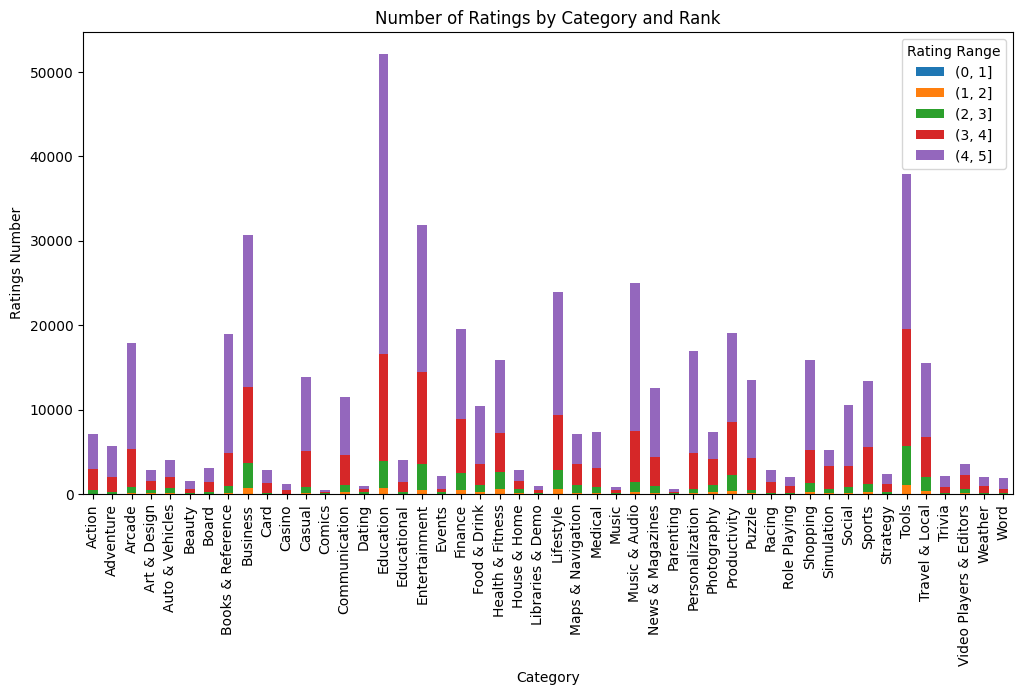

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Define ranges to group ratings
ranges = [0, 1, 2, 3, 4, 5]

# Create the range of each rating
rating_range = pd.cut(df_apps['Rating'], bins=ranges)

# Group data by category and rating range, and count the number of ratings in each group
counting_ratings_category = df_apps.groupby([df_apps['Category'], rating_range]).size().unstack(fill_value=0)

# Create the stacked bar chart
counting_ratings_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Ratings by Category and Rank')
plt.xlabel('Category')
plt.ylabel('Ratings Number')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend(title='Rating Range')
plt.show()

* The category with the highest number of qualifications is Education.
* The categories with fewer ratings are comics and parenting.
* The categories with the highest proportion of applications with a rating of 4 to 5 stars are Education, Business, Tools and Entertainment.

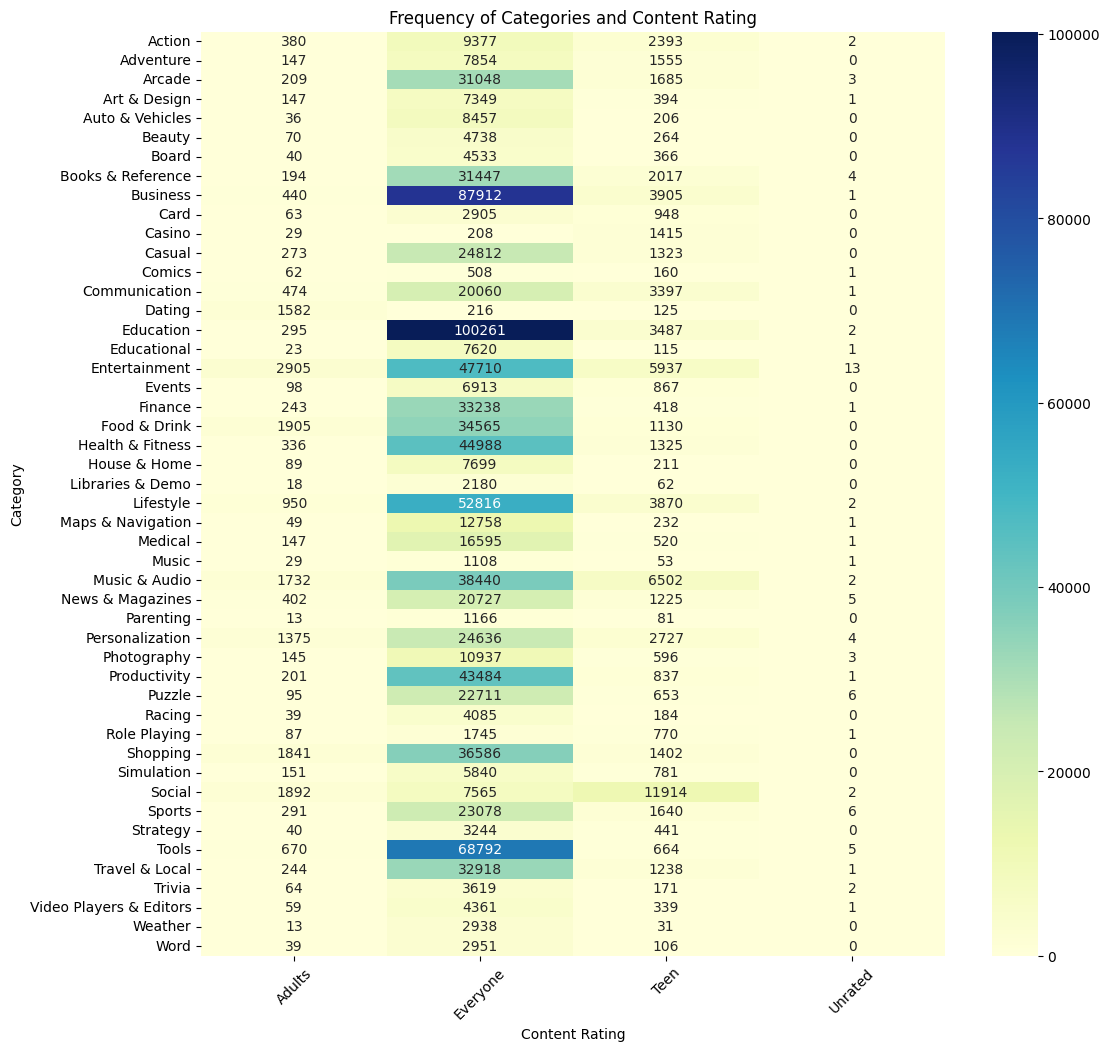

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the frequency table of category and content
frequency_table = df_apps.groupby(['Category', 'Content Rating']).size().unstack(fill_value=0)

# Create the heat map
plt.figure(figsize=(12, 12))
sns.heatmap(frequency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Frequency of Categories and Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

* Everyone has more apps in the categories of Education and Business.
* Teens have more apps in Social and Music and Audio.
* Adults have more apps in Entertainment.

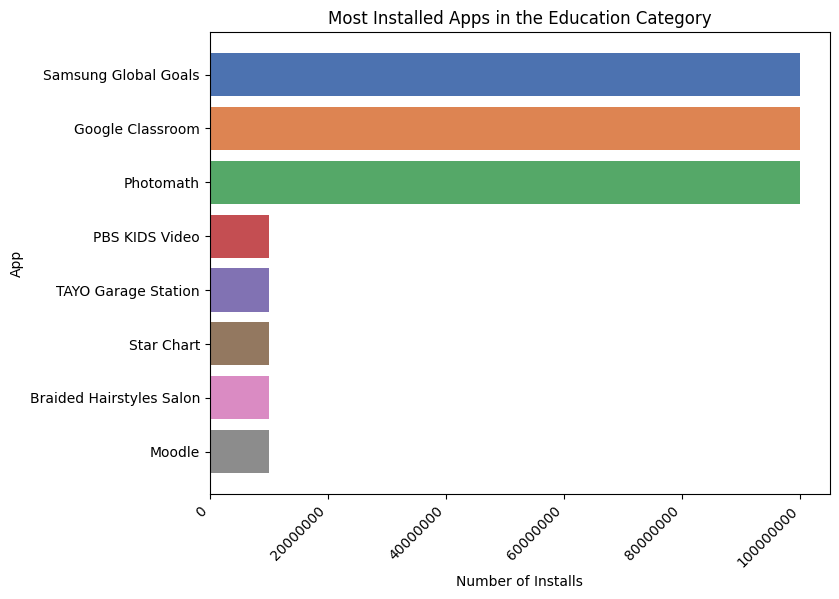

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove "+" and "," characters from installation numbers
df_modified = df_apps.assign(Installs=lambda x: x['Installs'].str.replace('+', '', regex=True).str.replace(',', '', regex=True))

# Convert facility values to numeric type
df_modified['Installs'] = pd.to_numeric(df_modified['Installs'], errors='coerce')

# Filter apps from category "Education"
df_educ = df_modified[df_modified['Category'] == 'Education']

# Sort applications by number of installations in descending order
educ_sorted = df_educ.sort_values(by='Installs', ascending=False)
top_educ = educ_sorted.head(8)

palette = sns.color_palette('deep', 8)

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(top_educ['App Name'], top_educ['Installs'], color=palette)

plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Education Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

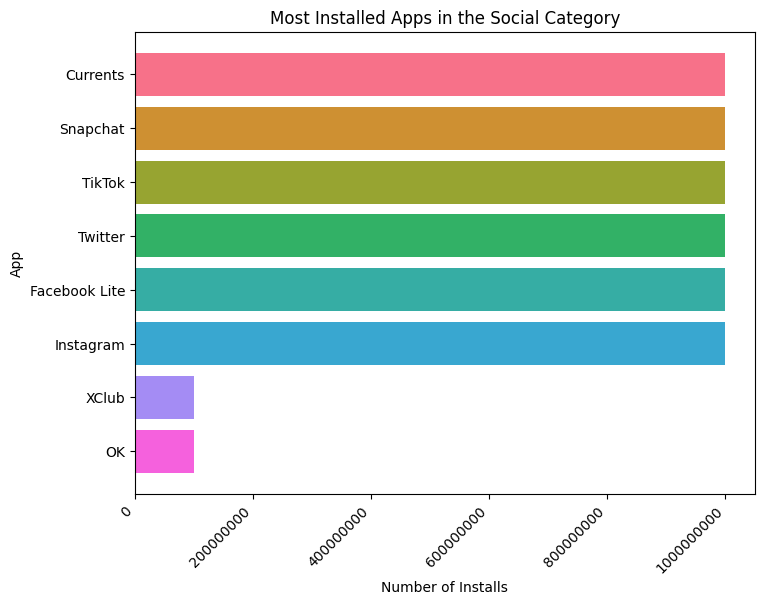

In [ ]:
# Filter apps from category "Social"
df_social = df_modified[df_modified['Category'] == 'Social']

# Sort applications by number of installations in descending order
social_sorted = df_social.sort_values(by='Installs', ascending=False)
top_social = social_sorted.head(8)

palette = sns.color_palette('husl', 8)

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(top_social['App Name'], top_social['Installs'], color=palette)

plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Social Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

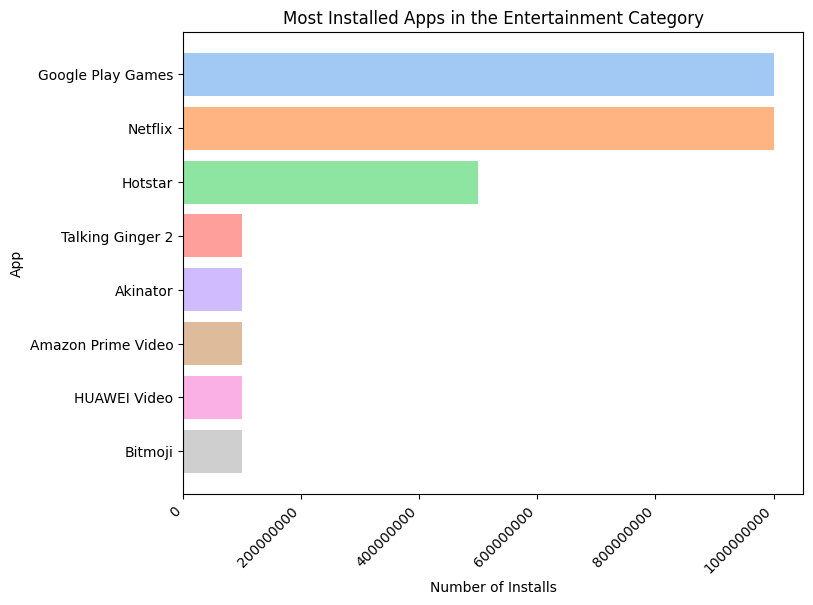

In [ ]:
# Filter apps from category "Entertainment"
df_entt = df_modified[df_modified['Category'] == 'Entertainment']

# Sort applications by number of installations in descending order
entt_sorted = df_entt.sort_values(by='Installs', ascending=False)
top_entt = entt_sorted.head(8)

palette = sns.color_palette('pastel', 8)

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(top_entt['App Name'], top_entt['Installs'], color=palette)

plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Entertainment Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [26]:
# Here we find the count of rating for each possible mean rating
rating_most = df_apps.Rating.value_counts()

In [27]:
df_apps.Rating.value_counts()

0.0    549768
5.0     54356
4.2     34342
4.4     32470
4.3     31382
4.6     29861
4.5     28494
4.1     26430
4.8     26274
4.0     26198
4.7     23976
3.9     21738
4.9     21379
3.8     21298
3.7     17418
3.6     14717
3.5     13231
3.4     12368
3.3      9646
3.2      9466
3.0      7691
3.1      6911
2.8      5686
2.9      5250
2.6      4377
2.7      4341
2.5      3348
2.4      2994
2.3      2623
2.2      2457
2.0      1925
2.1      1848
1.8      1442
1.9      1373
1.7       987
1.6       812
1.5       607
1.4       520
1.0       342
1.2       296
1.3       296
1.1       142
Name: Rating, dtype: int64

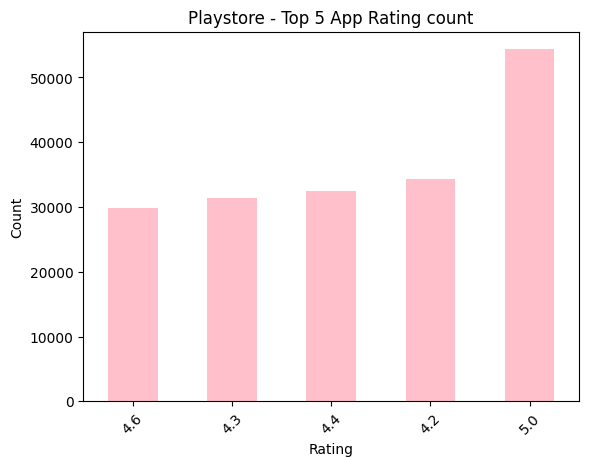

In [34]:
import matplotlib.pyplot as plt

#We look at the top five value counts  for rating
df_filtered = df_apps[df_apps["Rating"] != 0.0]
df_filtered["Rating"].value_counts().nlargest(5).sort_values(ascending=True).plot.bar(color='pink')
plt.ylabel("Count")
plt.xlabel("Rating")
plt.title("Playstore - Top 5 App Rating count")
plt.xticks(rotation=45)

plt.show()

In [36]:
#Here I try to sort app with rating 5 corresponding to installs and reviews
df5 = df_apps.sort_values(by=['Installs'], ascending=False)
df5

,App Name,Category,Installs,Size,Rating,Minimum Installs,Maximum Installs,Price,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
451995,Google Slides,Productivity,"500,000,000+",Varies with device,4.2,100.0,380.0,0.0,Varies with device,"Jun 25, 2014","Jun 15, 2021",Everyone,False,False,False
687323,Google Sheets,Productivity,"500,000,000+",Varies with device,4.0,100.0,380.0,0.0,Varies with device,"Apr 30, 2014","Jun 14, 2021",Everyone,False,False,False
645241,App Vault,Tools,"500,000,000+",23M,4.5,100.0,380.0,0.0,7.0 and up,"Sep 23, 2019","Jun 08, 2021",Everyone,True,False,False
949040,8 Ball Pool,Sports,"500,000,000+",67M,4.4,100.0,380.0,0.0,4.4 and up,"Jan 23, 2013","Jun 07, 2021",Everyone,True,True,True
856145,HiCare,Tools,"500,000,000+",26M,4.1,100.0,380.0,0.0,6.0 and up,"Nov 28, 2016","Mar 10, 2020",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238624,EnergyBuilder Data Capture,Business,0+,2.0M,0.0,0.0,0.0,0.0,5.0 and up,"Oct 17, 2019","Oct 17, 2019",Everyone,False,False,False
877464,Vaibhavmart Packer,Productivity,0+,4.4M,0.0,0.0,0.0,0.0,5.1 and up,"Feb 2, 2021","Feb 02, 2021",Everyone,False,False,False
122886,The Digital Classrooms,Education,0+,46M,0.0,0.0,0.0,0.0,5.0 and up,"May 25, 2021","May 25, 2021",Everyone,False,False,False
123003,calfhood,Education,0+,2.9M,0.0,0.0,0.0,0.0,7.0 and up,"Feb 24, 2021","Feb 25, 2021",Everyone,False,False,False


In [37]:
#Value count of each category for the apps with rating 5
df5.Category.value_counts(ascending=False)

Education                  104045
Business                    92258
Tools                       70131
Lifestyle                   57638
Entertainment               56565
Music & Audio               46676
Health & Fitness            46649
Productivity                44523
Shopping                    39829
Food & Drink                37600
Travel & Local              34401
Finance                     33900
Books & Reference           33662
Arcade                      32945
Personalization             28742
Casual                      26408
Sports                      25015
Communication               23932
Puzzle                      23465
News & Magazines            22359
Social                      21373
Medical                     17263
Maps & Navigation           13040
Action                      12152
Photography                 11681
Adventure                    9556
Auto & Vehicles              8699
House & Home                 7999
Art & Design                 7891
Events        

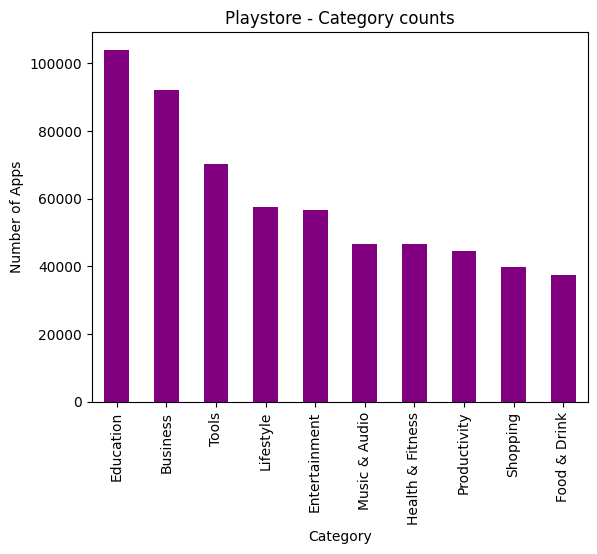

In [40]:
#Top five categories with respect to value count of app (rating=5)
df1.Category.value_counts(ascending=False).nlargest(10).sort_values(ascending=False).plot.bar(color='purple')
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Playstore - Category counts")
plt.show()